In [2]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel

In [18]:
models = []
num_models = 50
#potential_values = np.linspace(0, 1, num_models)
for i in range(num_models):
    nsteps=200
    nagents=20
    #P = []
    #for i in range(nagents):
    #    arr = []
    #    for j in range(nagents):
    #        arr.append(-1)
    #    P.append(arr)
    neighbs = neighbors.totally_connected(nagents, self_connected=True)
    #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
    linspaced = np.linspace(0, 1, nagents).tolist()
    opinions = [[i] for i in linspaced]
    #opinions = #[[np.random.rand()] for i in range(nagents)]
    #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
    pots = [potentials.tent(.63) for i in range(nagents)]
    coupling = [[1]]
    model = OpinionModel(nagents, neighbs, None, opinions, pots, coupling, 'pairwise')
    models.append(model)

In [19]:
import cProfile
def fn():
    for model in models:
        model.ALPHA = .01
        model.run(nsteps)
cProfile.run('fn()')

         3997345 function calls in 11.692 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   11.692   11.692 <ipython-input-19-3c05b1d62643>:2(fn)
        1    0.000    0.000   11.692   11.692 <string>:1(<module>)
        4    0.000    0.000    0.000    0.000 cycler.py:227(<genexpr>)
    10000    0.492    0.000    0.654    0.000 datacollection.py:133(collect)
   304610    0.327    0.000    0.327    0.000 opinions.py:10(clamp)
    10000    0.038    0.000   11.677    0.001 opinions.py:198(step)
       50    0.014    0.000   11.692    0.234 opinions.py:205(run)
   200000    0.095    0.000    0.095    0.000 opinions.py:217(<lambda>)
   200000    0.510    0.000    0.564    0.000 opinions.py:59(reset)
   200000    3.304    0.000    8.704    0.000 opinions.py:63(pairwiseStep)
   162305    2.509    0.000    2.509    0.000 opinions.py:68(<listcomp>)
   304610    0.775    0.000    0.854    0.000 potentials.

In [20]:
def fn2():
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
cProfile.run('fn2()')

         1288354 function calls (1287354 primitive calls) in 3.520 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1500    0.003    0.000    0.008    0.000 <frozen importlib._bootstrap>:996(_handle_fromlist)
        1    0.127    0.127    3.519    3.519 <ipython-input-20-fb5b18aa0773>:1(fn2)
        1    0.001    0.001    3.520    3.520 <string>:1(<module>)
       50    0.000    0.000    0.000    0.000 __init__.py:120(lzip)
   200450    0.293    0.000    0.444    0.000 __init__.py:177(iteritems)
      150    0.000    0.000    0.005    0.000 _methods.py:37(_any)
      100    0.000    0.000    0.003    0.000 _methods.py:40(_all)
      100    0.000    0.000    0.000    0.000 _validators.py:220(validate_bool_kwarg)
      100    0.002    0.000    0.009    0.000 algorithms.py:132(_reconstruct_data)
      100    0.001    0.000    0.001    0.000 algorithms.py:1337(_get_take_nd_function)
      100    0.008    0.000    0.032    

       50    0.000    0.000    0.000    0.000 internals.py:303(dtype)
       50    0.000    0.000    0.001    0.000 internals.py:307(ftype)
       50    0.000    0.000    0.000    0.000 internals.py:3296(is_consolidated)
       50    0.000    0.000    0.001    0.000 internals.py:3304(_consolidate_check)
       50    0.000    0.000    0.001    0.000 internals.py:3305(<listcomp>)
       50    0.000    0.000    0.000    0.000 internals.py:3576(_consolidate_inplace)
       50    0.001    0.000    0.052    0.001 internals.py:4306(create_block_manager_from_arrays)
       50    0.003    0.000    0.037    0.001 internals.py:4317(form_blocks)
       50    0.001    0.000    0.011    0.000 internals.py:4441(_multi_blockify)
       50    0.000    0.000    0.000    0.000 internals.py:4445(<lambda>)
       50    0.002    0.000    0.004    0.000 internals.py:4473(_stack_arrays)
       50    0.000    0.000    0.001    0.000 internals.py:4476(_asarray_compat)
       50    0.000    0.000    0.000    0.0

In [21]:
for model in models:
    model.ALPHA = .01
    model.run(nsteps)
agent_opinions = []
for model in models:
    agent_opinion = model.datacollector.get_agent_vars_dataframe()
    agent_opinions.append(agent_opinion)
x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x);

ValueError: cannot reshape array of size 8000 into shape (200,20)

In [3]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import UF_read

tau = .63
while tau > .4:
    models = []
    num_models = 1
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        nsteps=500
        nagents=20
        #P = []
        #for i in range(nagents):
        #    arr = []
        #    for j in range(nagents):
        #        arr.append(-1)
        #    P.append(arr)
        neighbs = neighbors.totally_connected(nagents, self_connected=True)
        #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
        linspaced = np.linspace(0, 1, nagents).tolist()
        opinions = [[i] for i in linspaced]
        #opinions = [[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        pots = [potentials.tent(tau) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighbs, None, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .005
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
    plt.plot(x);
    from analysis import opinions_clusters
    from analysis import num_clusters
    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    #print(sum)
    print("average: %f for tau: %f" %(float(sum) / float(num_models), tau))
    tau = .4

AttributeError: 'numpy.float64' object has no attribute 'clamp'

In [3]:
from opinions import OpinionAgentParameters
from opinions import OpinionAgent
point_5 = lambda a: .5
a = OpinionAgent(OpinionAgentParameters(0, model, [[1],[0]], potentials.tent(.5), [1, 1]))
print(len(a.weights))
print(len(a.model.schedule.agents))
model

NameError: name 'model' is not defined

average: 2.000000 for tau: 0.580000


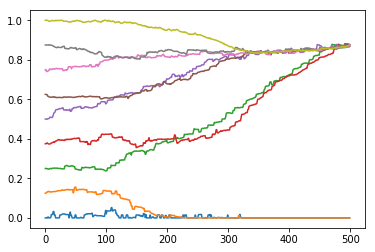

In [5]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import UF_read

tau = .58
while tau < .76:
    models = []
    num_models = 1
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        #Setup neighbors
        weights = UF_read.read('neighborhood_matrices/cage4.mat')
        nsteps=500
        nagents= len(weights)
        neighborhood = neighbors.weight_to_neighbors(weights)
        
        #setup initial opinions
        linspaced = np.linspace(0, 1, nagents).tolist()
        opinions = [[i] for i in linspaced]
        
        #opinions = [[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        
        #Potentials and coupling
        pots = [potentials.tent(tau) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighborhood, weights, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .02
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
    plt.plot(x);
    from analysis import opinions_clusters
    from analysis import num_clusters
    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    #print(sum)
    print("average: %f for tau: %f" %(float(sum) / float(num_models), tau))
    tau = .76